**Exercise: Bimetallic Quasi-Static Thermal Simulation using Steel and Brass Unit Square using FEniCS**

In this exercise, you will perform a bimetallic quasi-static thermal simulation using the Finite Element Method (FEM) with FEniCS. The simulation will involve a unit square made of two different materials: steel and brass. The goal is to analyze the steady-state temperature distribution within the square and observe the thermal behavior at the interface of the two materials. |


**Materials:**

The following table provides the material properties for steel and brass:

| Material | Thermal Conductivity (k) [W/mK] | Specific Heat Capacity (Cp) [J/kgK] | Density (ρ) [kg/m³] |
| -------- | ------------------------------- | ----------------------------------- | ------------------- |
| Steel    | 50.2                            | 486.0                               | 7850                |
| Brass    | 109.0                           | 377.0                               | 8520                |


**Task:**

1. **Geometry and Mesh Generation:**
   - Create a unit square with side length L = 1.0 units (you can choose any unit system).
   - Divide the square into a suitable number of elements to create a mesh. You can start with a relatively coarse mesh and later refine it to observe its effect on the simulation results.


In [9]:
from dolfin import *
from matplotlib import pyplot as plt
mesh = UnitSquareMesh(10, 10)

2. **Setting up the Problem:**
   - Define the governing equation for steady-state heat conduction in 2D. The equation involves the Laplace operator and accounts for the material properties.
   - Implement appropriate boundary conditions for the simulation. Specify the temperature boundary condition for all four sides of the unit square. You can use Dirichlet boundary conditions, where you set the temperature values at the boundaries.


In [10]:
def lateral_sides(x, on_boundary):
    return (near(x[0], 0) or near(x[0], 1)) and on_boundary


def bottom(x, on_boundary):
    return near(x[1], 0) and on_boundary


def top(x, on_boundary):
    return near(x[1], 1) and on_boundary

3. **Material Properties:**
   - Use the provided material properties for steel and brass.


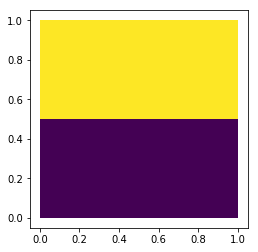

In [25]:
mat_1_sub_domain = CompiledSubDomain("x[1]<=D/2", D=1)
mat_2_sub_domain = CompiledSubDomain("x[1]>=D/2", D=1)

dim = mesh.topology().dim()
mf = MeshFunction("size_t", mesh, dim)

mat_1 = 1
mat_2 = 2

mat_1_sub_domain.mark(mf, mat_1)
mat_2_sub_domain.mark(mf, mat_2)

plot(mf)

mat_prop = {
    "steel": {"k": 50.2},
    "brass": {"k": 1090}
}
dx = Measure("dx", subdomain_data=mf)

4. **Thermal Simulation:**
   - Assemble the finite element problem using FEniCS and solve the system of equations to obtain the temperature distribution within the unit square.
   - Perform the simulation for different time steps to observe the quasi-static behavior of the system. You can use a small time step for better accuracy.


In [26]:
VT = FunctionSpace(mesh, "CG", 1)
T_, dT = TestFunction(VT), TrialFunction(VT)
Delta_T = Function(VT, name="Temperature increase")

In [27]:
aT = dot(mat_prop["steel"]["k"]*grad(dT), grad(T_))*dx(mat_1) + \
    dot(mat_prop["brass"]["k"]*grad(dT), grad(T_))*dx(mat_2)
LT = Constant(0)*T_*dx

bcT = [DirichletBC(VT, Constant(50.), bottom),
       DirichletBC(VT, Constant(0.), top),
       DirichletBC(VT, Constant(0.), lateral_sides)]
solve(aT == LT, Delta_T, bcT)

5. **Post-Processing and Analysis:**
   - Visualize the temperature distribution using contour plots or color maps.
   - Analyze the temperature distribution at the interface between steel and brass. Observe if there are any significant temperature gradients or discontinuities at this interface.


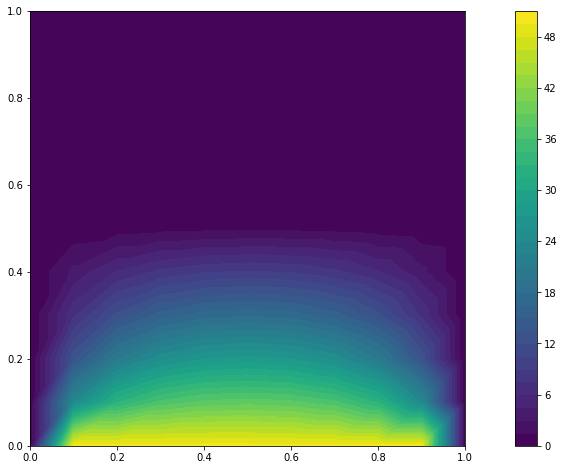

In [28]:
plt.figure(figsize=(18, 8))
p = plot(Delta_T)
plt.colorbar(p)
plt.show()

6. **Mesh Refinement:**
   - Re-run the simulation with a refined mesh (i.e., more elements) and compare the results with the coarser mesh. Discuss the differences and the effect of mesh refinement on the accuracy of the simulation.


7. **Discussion and Conclusion:**
   - Write a summary of your findings, including observations about the temperature distribution, behavior at the interface of the two materials, and the influence of mesh refinement on the simulation results.
